# Load PAGES 2k

**load PAGES 2k data from LiPDverse** (https://lipdverse.org/Pages2kTemperature/current_version/, downloaded 31/10/2025 by LL)


Created 15/06/2023 by Lucie Luecke (LL)

Last updated: 
06/11/2025 by LL: Introduced filtering for specific `paleoData_proxy` and `paleoData_variableName`
29/10/2025 by LL: Tidied up and load most current PAGES 2k version (v2.2)
27/11/2024 by LL: Changed `d2H` to `dD`
21/11/2024 by LL: added option to csv saving of compact dataframe, removed redundant output.
10/07/2024 by LL: silenced certain sections, commented on code, added headers and plots


Here we extract a dataframe with the following columns:

  - ```archiveType```
  - ```dataSetName```
  - ```datasetId```
  - ```geo_meanElev```
  - ```geo_meanLat```
  - ```geo_meanLon```
  - ```geo_siteName```
  - ```interpretation_direction``` (new in v2.0)
  - ```interpretation_variable```
  - ```interpretation_variableDetail```
  - ```interpretation_seasonality``` (new in v2.0)
  - ```originalDataURL```
  - ```originalDatabase```
  - ```paleoData_notes```
  - ```paleoData_proxy```
  - ```paleoData_sensorSpecies```
  - ```paleoData_units```
  - ```paleoData_values```
  - ```paleoData_variableName```
  - ```year```
  - ```yearUnits```

We save a standardised compact dataframe for concatenation to DoD2k


## Set up working environment

Make sure the repo_root is added correctly, it should be: ```your_root_dir/dod2k```
This should be the working directory throughout this notebook (and all other notebooks).

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
from pathlib import Path

# Add parent directory to path (works from any notebook in notebooks/)
# the repo_root should be the parent directory of the notebooks folder
init_dir = Path().resolve()
# Determine repo root
if init_dir.name == 'dod2k': repo_root = init_dir
elif init_dir.parent.name == 'dod2k': repo_root = init_dir.parent
else: raise Exception('Please review the repo root structure (see first cell).')

# Update cwd and path only if needed
if os.getcwd() != str(repo_root):
    os.chdir(repo_root)
if str(repo_root) not in sys.path:
    sys.path.insert(0, str(repo_root))

print(f"Repo root: {repo_root}")
if str(os.getcwd())==str(repo_root):
    print(f"Working directory matches repo root. ")

Repo root: /home/jupyter-lluecke/dod2k
Working directory matches repo root. 


In [2]:
# Import packages
# import lipd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lipd

from dod2k_utilities import ut_functions as utf # contains utility functions
from dod2k_utilities import ut_plot as uplt # contains plotting functions

## Load source data

In order to get the source data, run the cell below, which downloads the data directly from LiPDverse into the directory data/pages2k:

In [3]:
# # # Download the file

# !wget -O data/pages2k/Pages2kTemperature2_2_0.pkl https://lipdverse.org/Pages2kTemperature/current_version/Pages2kTemperature2_2_0.pkl


In [4]:
read_PAGES = pd.read_pickle('data/pages2k/Pages2kTemperature2_2_0.pkl')
df_orig    = pd.DataFrame(read_PAGES['TS']) #converts metadata into a DataFrame
# df_metadata   = pd.DataFrame(read_PAGES['D'])

Create empty dataframe with standardised columns and populate with data and metadata:

mapping:
  - ```archiveType```             (no change)
  - ```interpretation_direction``` (new in DT2k v1.2) <-- (```paleoData_interpretation``` --> ```direction```)
  - ```interpretation_seasonality``` (new in DT2k v1.2) <-- (```paleoData_interpretation``` --> ```seasonality```)
  - ```interpretation_variable``` <-- (```paleoData_interpretation``` --> ```variable```)
  - ```interpretation_variableDetail``` <-- (```paleoData_interpretation``` --> ```variableDetail```)
  - ```dataSetName```             (no change)
  - ```datasetId```               (no change)
  - ```geo_meanElev```            (no change)
  - ```geo_meanLat```             (no change)
  - ```geo_meanLon```             (no change)
  - ```geo_siteName```            (no change)
  - ```originalDataURL```         <-- (`paleoData_WDSPaleoUrl`)
  - ```originalDatabase```        <-- (```PAGES 2k v2.2.0```)
  - ```paleoData_notes```         (no change)
  - ```paleoData_proxy```         <-- paleoData_variableName
  - ```paleoData_sensorSpecies``` (no change)
  - ```paleoData_units```         (no change)
  - ```paleoData_values```        (no change)
  - ```year```                    (no change)
  - ```yearUnits```               (no change)

## create and populate compact dataframe

In [5]:
df_compact = df_orig[['archiveType',  'dataSetName', 'datasetId',  'geo_meanElev', 'geo_meanLat',
                      'geo_meanLon', 'geo_siteName', 'paleoData_notes', 
                      'paleoData_units', 'paleoData_values', 
                      'paleoData_sensorSpecies', 'year', 'yearUnits']]

Create the remaining columns and populate with data
- ```paleoData_variableName``` as extra column```paleoData_variableName```
- ```paleoData_proxy``` as ```paleoData_proxy``` except for missing data, then paleoData_variableName
- ```originalDatabase``` is PAGES 2k v2.2.0
- extract ```climateInterpretation``` from ```interpretation```

In [6]:

df_compact.insert(8, "originalDataURL",  df_orig['paleoData_WDSPaleoUrl'].values)
df_compact.insert(8, "paleoData_proxy",  df_orig['paleoData_proxy'].values)
df_compact.insert(8, "paleoData_variableName",  df_orig['paleoData_variableName'].values)
df_compact.insert(9, "originalDatabase", ["PAGES 2k v2.2.0"]*len(df_orig))
df_compact.insert(1, "interpretation_direction", np.empty(len(df_orig), dtype=object))
df_compact.insert(2, "interpretation_seasonality", np.empty(len(df_orig), dtype=object))
df_compact.insert(3, "interpretation_variable", np.empty(len(df_orig), dtype=object))
df_compact.insert(4, "interpretation_variableDetail", np.empty(len(df_orig), dtype=object))

print(df_compact.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3699 entries, 0 to 3698
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   archiveType                    3699 non-null   object 
 1   interpretation_direction       0 non-null      object 
 2   interpretation_seasonality     0 non-null      object 
 3   interpretation_variable        0 non-null      object 
 4   interpretation_variableDetail  0 non-null      object 
 5   dataSetName                    3699 non-null   object 
 6   datasetId                      3699 non-null   object 
 7   geo_meanElev                   3699 non-null   float64
 8   geo_meanLat                    3699 non-null   float64
 9   geo_meanLon                    3699 non-null   float64
 10  geo_siteName                   3699 non-null   object 
 11  paleoData_notes                465 non-null    object 
 12  paleoData_variableName         3699 non-null   o

- Drop rows with missing data: 
  - all NaNs
  -  NaNs for `year` or `paleoData_values` (no data records)
- Populate missing `paleoData_proxy` entries with `paleoData_variableName`

In [7]:
# drop the rows with all NaNs (those not for global temperature analysis)
print(len(df_compact))
df_compact = df_compact.dropna(how='all')
print(len(df_compact))
for subset in ['year', 'paleoData_values']:
    df_compact = df_compact.dropna(subset=subset, how='all')
    print(len(df_compact))
    
for ii in df_compact.index:
    if not isinstance(df_compact.at[ii, 'paleoData_proxy'], str):
        df_compact.at[ii, 'paleoData_proxy'] = df_compact.at[ii, 'paleoData_variableName']

3699
3699
3693
3693


In [8]:
# drop all rows which do not have entries for paleoData_proxy
# df_compact = df_compact.dropna(subset='paleoData_proxy')

Populate columns associated with ```paleoData_interpretation``` in original dataframe ```df_orig``` (extracted from dictionary)

In [9]:
keys = ['interpretation_direction', 'interpretation_seasonality',
       'interpretation_variable', 'interpretation_variableDetail']

for ii in df_compact.index:
    if type(df_orig.at[ii, 'paleoData_interpretation'])!=list: continue
    for key in keys:
        if key.split('_')[-1] in df_orig.at[ii, 'paleoData_interpretation'][0].keys():
            df_compact.at[ii, key] = df_orig.at[ii, 'paleoData_interpretation'][0][key.split('_')[-1]]
            

clean ```df_compact``` from 
- non-numeric values for ```year``` or ```paleodata_values```
- empty paleoData_values
- fill empty values with 'N/A'
- include Common Era only

In [10]:
drop_inds = []
for ii in df_compact.index:
    try:
        year = np.array(df_compact.at[ii, 'year'], dtype=float)
        vals = np.array(df_compact.at[ii, 'paleoData_values'], dtype=float)
        df_compact.at[ii, 'year']             = year[year>=1]
        df_compact.at[ii, 'paleoData_values'] = vals[year>=1]
    except:
        # print
        df_compact.at[ii, 'paleoData_values'] = np.array([utf.convert_to_float(y) for y in df_compact.at[ii, 'paleoData_values']], dtype=float)
        df_compact.at[ii, 'year'] = np.array([utf.convert_to_float(y) for y in df_compact.at[ii, 'year']], dtype=float)
        
        print(f'Converted values in paleoData_values and/or year for {ii}.')
        # drop_inds.append(ii)
# df_compact = df_compact.drop(drop_inds)

Converted values in paleoData_values and/or year for 308.
Converted values in paleoData_values and/or year for 312.
Converted values in paleoData_values and/or year for 510.
Converted values in paleoData_values and/or year for 901.
Converted values in paleoData_values and/or year for 1697.
Converted values in paleoData_values and/or year for 1699.
Converted values in paleoData_values and/or year for 1969.
Converted values in paleoData_values and/or year for 1979.
Converted values in paleoData_values and/or year for 1984.
Converted values in paleoData_values and/or year for 2336.
Converted values in paleoData_values and/or year for 2341.
Converted values in paleoData_values and/or year for 2591.
Converted values in paleoData_values and/or year for 2903.
Converted values in paleoData_values and/or year for 3338.
Converted values in paleoData_values and/or year for 3339.
Converted values in paleoData_values and/or year for 3343.
Converted values in paleoData_values and/or year for 3344.


In [11]:
# drop all missing values and exclude all-missing-values-rows

for ii in df_compact.index:
    dd   = np.array(df_compact.at[ii, 'paleoData_values'])
    mask = dd==-9999.99
    df_compact.at[ii, 'paleoData_values']=dd[~mask]
    df_compact.at[ii, 'year']=np.array(df_compact.at[ii, 'year'])[~mask]
    
drop_inds = []
for ii, row in enumerate(df_compact.paleoData_values):
    if len(row)==0:
        print(ii, 'empty row for paleodata_values')
    elif len(df_compact.iloc[ii]['year'])==0:
        print(ii, 'empty row for year')
    elif np.std(row)==0: 
        print(ii, 'std=0')
    elif np.sum(np.diff(row)**2)==0: 
        print(ii, 'diff=0')
    elif np.isnan(np.std(row)):
        print(ii, 'std nan')
    else:
        continue
    if df_compact.index[ii] not in drop_inds: 
        drop_inds += [df_compact.index[ii]]
    
print(drop_inds)
df_compact = df_compact.drop(index=drop_inds)

87 std nan
89 std nan
195 std nan
199 std nan
234 std nan
246 std nan
256 std nan
308 std nan
312 std nan
398 std nan
400 std nan
441 std nan
443 std nan
510 empty row for paleodata_values
545 std nan
547 std nan
573 std nan
641 std nan
675 std nan
677 std nan
678 std nan
838 std nan
883 std nan
885 std nan
886 std nan
887 std nan
888 std nan
901 empty row for paleodata_values
904 std nan
908 std nan
963 std nan
966 std nan
968 std nan
969 std nan
1079 std nan
1081 std nan
1366 std nan
1369 std nan
1372 std nan
1472 std nan
1476 std nan
1499 std nan
1500 std nan
1501 std nan
1502 std nan
1503 std nan
1504 std nan
1505 std nan
1506 std nan
1507 std nan
1508 std nan
1509 std nan
1531 std nan
1533 std nan
1631 std nan
1676 std nan
1697 empty row for paleodata_values
1699 empty row for paleodata_values
1702 std nan
1761 std nan
1762 std nan
1764 std nan
1765 std nan
1766 std nan
1767 std nan
1768 std nan
1779 std nan
1780 std nan
1830 std nan
1832 std nan
1924 std nan
1927 std nan
1969 emp

Note that the datasetId is not unique for each record and thus we add an additional array of strings to make the datasetId unique.

In [12]:
#  check that the datasetId is unique 
print('dataset length: ', len(df_compact))
print('unique datasetIds:', len(df_compact.datasetId.unique()))
# make datasetId unique by simply adding index number
df_compact.datasetId=df_compact.apply(lambda x: 'pages2k_'+str(x.name), axis=1)
# check uniqueness - problem solved.
assert len(df_compact)== len(df_compact.datasetId.unique())

dataset length:  3585
unique datasetIds: 646


In [13]:
# df_compact = df_compact.fillna(value='N/A')

### Apply standard terminology 

Convert standardised values to comply with dod2k terminology:
- ```archiveType```
  - ['Borehole' 'Coral' 'Documents' 'GlacierIce' 'LakeSediment' 'MarineSediment' 'Other' 'Sclerosponge' 'Speleothem' 'Wood']
- ```interpretation_variable```
  - allow only ```moisture``` and ```temperature``` (save original variable in variableDetail)
- ```yearUnits```
  - ```yr AD``` to ```CE```

In [14]:
# archiveType 
# df_compact['archiveType'] = df_compact['archiveType'].replace({
#     'wood': 'tree', 'lakesediment': 'lake sediment',
#     'marinesediment': 'marine sediment',  'glacierice': 'glacier ice'})
df_compact['interpretation_variable']=df_compact['interpretation_variable'].fillna('N/A')
interpretation_dict = {'precipitation': 'moisture', 'effectivePrecipitation': 'moisture', 'seaIce': 'N/A', 'None': 'N/A'}


for key in interpretation_dict.keys():
    mask = df_compact['interpretation_variable'] == key

    df_compact.loc[mask, 'interpretation_variableDetail'] = (
        'Original interpretation_variable: '
        + key
        + ', interpretation_variableDetail: '
        + df_compact.loc[mask, 'interpretation_variableDetail']
            .fillna('N/A')
    )

df_compact['interpretation_variable'] = df_compact['interpretation_variable'].replace(
    interpretation_dict)

update_proxy_terms = {'ring width': 'ring width', 'ringWidth': 'ring width', 
                      'maximum latewood density': 'maximum latewood density', 
                      'calcificationRate': 'calcification rate', 'density': 'maximum latewood density', 
                      'd2H': 'dD', 'MXD': 'maximum latewood density',
                      'iceMelt': 'ice melt', 'residualChronology': 'residual chronology', 
                      'varveThickness': 'varve thickness',
                      'effectivePrecipitation': 'effective precipitation',
                      'humidificationIndex': 'humidification index',
                     }

df_compact['paleoData_proxy'] = df_compact['paleoData_proxy'].replace(update_proxy_terms)

df_compact['paleoData_variableName'] = df_compact['paleoData_variableName'].replace(update_proxy_terms)

df_compact['yearUnits'] = df_compact['yearUnits'].replace({'yr AD': 'CE'})

In [15]:
df_compact.interpretation_variable.unique()

array(['temperature', 'N/A', 'moisture'], dtype=object)

In [16]:
np.sort(df_compact.archiveType.unique())

array(['Borehole', 'Coral', 'Documents', 'GlacierIce', 'LakeSediment',
       'MarineSediment', 'Other', 'Sclerosponge', 'Speleothem', 'Wood'],
      dtype=object)

### ensure correct datatype

In [17]:
# KF: Type-checking
df_compact = df_compact.astype({'archiveType': str, 'dataSetName': str, 'datasetId': str, 'geo_meanElev': float, 'geo_meanLat': float, 'geo_meanLon': float, 'geo_siteName': str, 
                    'originalDatabase': str, 'originalDataURL': str, 'paleoData_notes': str, 'paleoData_proxy': str, 'paleoData_units': str, 'yearUnits': str,
               'interpretation_direction': str, 'interpretation_seasonality': str, 'interpretation_variable': str,'interpretation_variableDetail': str })
df_compact['year'] = df_compact['year'].map(lambda x: np.array(x, dtype = float))
df_compact['paleoData_values'] = df_compact['paleoData_values'].map(lambda x: np.array(x, dtype = float))


### select for `paleoData_proxy` and/or `paleoData_variableName` 

A lot of entries in the dataset are metadata for the actual records, such as e.g. ```year``` which should have a place in the ```year``` column, not in ```paleoData_values``` as a separate series. 

All keys mentioned in the list below are dropped accordingly.

In [18]:
for key in ['needsToBeChanged', 'year', 'uncertainty1s', 'JulianDay', 'age', 'uncertaintyHigh', 'uncertaintyLow',
            'uncertaintyHigh95', 'uncertaintyLow95', 'sampleID', 'sampleCount', 'segmentLength', 'correlationCoefficient', 
            'notes', 'uncertainty', 'BSi', 'EPS', 'RBAR', 'core', 'depth','depthBottom', 'depthTop', 'duration']:
    df_compact = df_compact[df_compact.paleoData_proxy != key]
    df_compact = df_compact[df_compact.paleoData_variableName != key]

Check that the remaining data in `paleoData_proxy` is sensible and points to relevant data values:

In [19]:
# list the values for paleoData_proxy
np.sort(df_compact['paleoData_proxy'].unique())

array(['ARSTAN', 'Mg/Ca', 'Sr/Ca', 'TEX86', 'Uk37', 'accumulation rate',
       'alkenone', 'borehole', 'calcification rate', 'chironomid',
       'chloride', 'chrysophyte assemblage', 'concentration', 'count',
       'd13C', 'd18O', 'dD', 'diatom', 'dinocyst', 'dust',
       'effective precipitation', 'foraminifera', 'historical',
       'humidification index', 'ice melt', 'maximum latewood density',
       'multiproxy', 'nitrate', 'pollen', 'reflectance',
       'residual chronology', 'ring width', 'sodium', 'sulfate',
       'temperature', 'thickness', 'varve thickness'], dtype=object)

In [20]:
# list the values for paleoData_variableName
np.sort(df_compact['paleoData_variableName'].unique())

array(['ARSTAN', 'MAR', 'Mg/Ca', 'R650/R700', 'RABD660670', 'Sr/Ca',
       'TEX86', 'Uk37', 'calcification rate', 'chloride', 'composite',
       'concentration', 'count', 'd13C', 'd18O', 'dD', 'dust',
       'effective precipitation', 'humidification index', 'ice melt',
       'maximum latewood density', 'nitrate', 'precipitation',
       'reflectance', 'residual chronology', 'ring width', 'sodium',
       'sulfate', 'temperature', 'thickness', 'varve thickness'],
      dtype=object)

In [21]:
df_compact.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1364 entries, 0 to 3697
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   archiveType                    1364 non-null   object 
 1   interpretation_direction       1364 non-null   object 
 2   interpretation_seasonality     1364 non-null   object 
 3   interpretation_variable        1364 non-null   object 
 4   interpretation_variableDetail  1364 non-null   object 
 5   dataSetName                    1364 non-null   object 
 6   datasetId                      1364 non-null   object 
 7   geo_meanElev                   1364 non-null   float64
 8   geo_meanLat                    1364 non-null   float64
 9   geo_meanLon                    1364 non-null   float64
 10  geo_siteName                   1364 non-null   object 
 11  paleoData_notes                1364 non-null   object 
 12  paleoData_variableName         1364 non-null   object

## save compact dataframe

In [22]:
df_compact = df_compact[sorted(df_compact.columns)]
print(df_compact.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1364 entries, 0 to 3697
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   archiveType                    1364 non-null   object 
 1   dataSetName                    1364 non-null   object 
 2   datasetId                      1364 non-null   object 
 3   geo_meanElev                   1364 non-null   float64
 4   geo_meanLat                    1364 non-null   float64
 5   geo_meanLon                    1364 non-null   float64
 6   geo_siteName                   1364 non-null   object 
 7   interpretation_direction       1364 non-null   object 
 8   interpretation_seasonality     1364 non-null   object 
 9   interpretation_variable        1364 non-null   object 
 10  interpretation_variableDetail  1364 non-null   object 
 11  originalDataURL                1364 non-null   object 
 12  originalDatabase               1364 non-null   object

### save pickle

In [23]:
# save to a pickle file (security: is it better to save to csv?)
# sort columns alphabetically (so they all appear in same order across the compact dataframes, for easy comparison)

df_compact.to_pickle('data/pages2k/pages2k_compact.pkl')

### save csv

In [24]:
# save to a list of csv files (metadata, data, year)
df_compact.name='pages2k'
utf.write_compact_dataframe_to_csv(df_compact)

METADATA: datasetId, archiveType, dataSetName, geo_meanElev, geo_meanLat, geo_meanLon, geo_siteName, interpretation_direction, interpretation_seasonality, interpretation_variable, interpretation_variableDetail, originalDataURL, originalDatabase, paleoData_notes, paleoData_proxy, paleoData_sensorSpecies, paleoData_units, paleoData_variableName, yearUnits
Saved to /home/jupyter-lluecke/dod2k/data/pages2k/pages2k_compact_%s.csv


In [25]:
# load dataframe
df = utf.load_compact_dataframe_from_csv('pages2k')

## Visualise dataframe

Show spatial distribution of records, show archive and proxy types

0 Wood 970
1 MarineSediment 145
2 Coral 119
3 LakeSediment 52
4 GlacierIce 52
5 Documents 13
6 Speleothem 4
7 Sclerosponge 4
8 Borehole 3
9 Other 2
saved figure in /home/jupyter-lluecke/dod2k/figs/pages2k/geo_pages2k.pdf


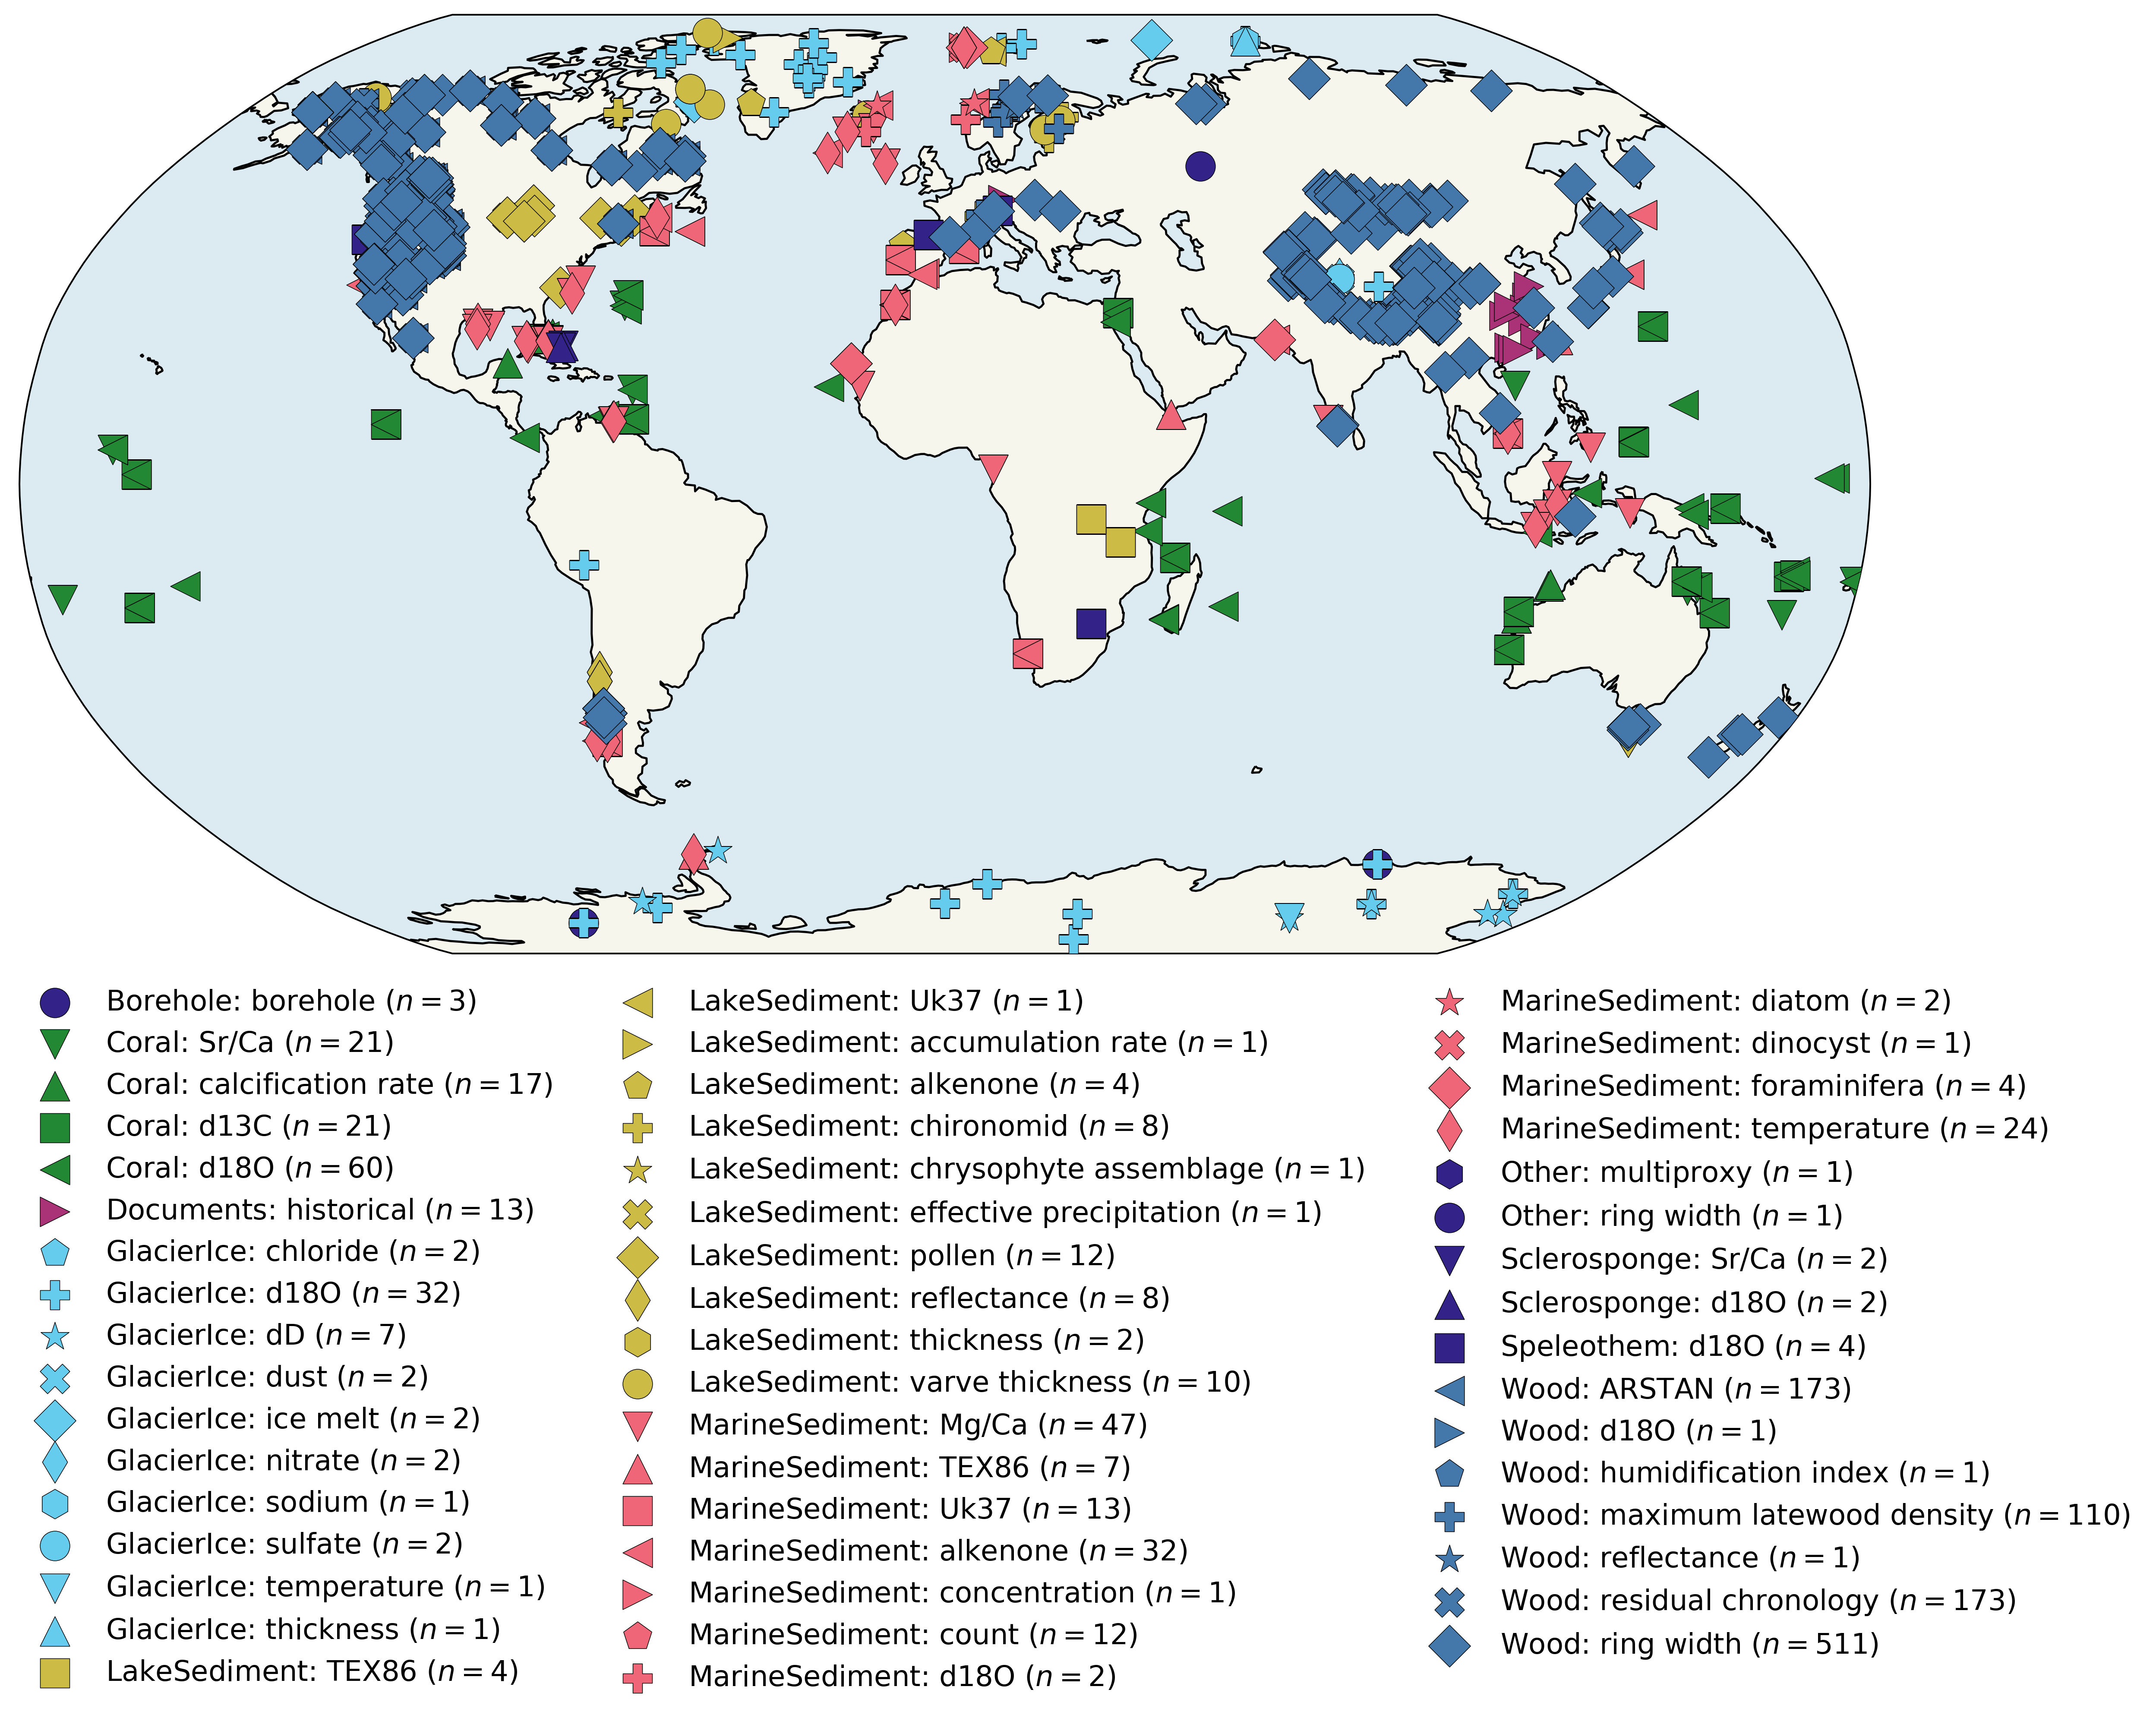

In [26]:
# count archive types
archive_count = {}
for ii, at in enumerate(set(df['archiveType'])):
    archive_count[at] = df.loc[df['archiveType']==at, 'archiveType'].count()

sort = np.argsort([cc for cc in archive_count.values()])
archives_sorted = np.array([cc for cc in archive_count.keys()])[sort][::-1]

# Specify colour for each archive (smaller archives get grouped into the same colour)
archive_colour, major_archives, other_archives = uplt.get_archive_colours(archives_sorted, archive_count)

fig = uplt.plot_geo_archive_proxy(df, archive_colour)
utf.save_fig(fig, f'geo_{df.name}', dir=df.name)

Now plot the coverage over the Common Era

saved figure in /home/jupyter-lluecke/dod2k/figs/pages2k/time_pages2k.pdf


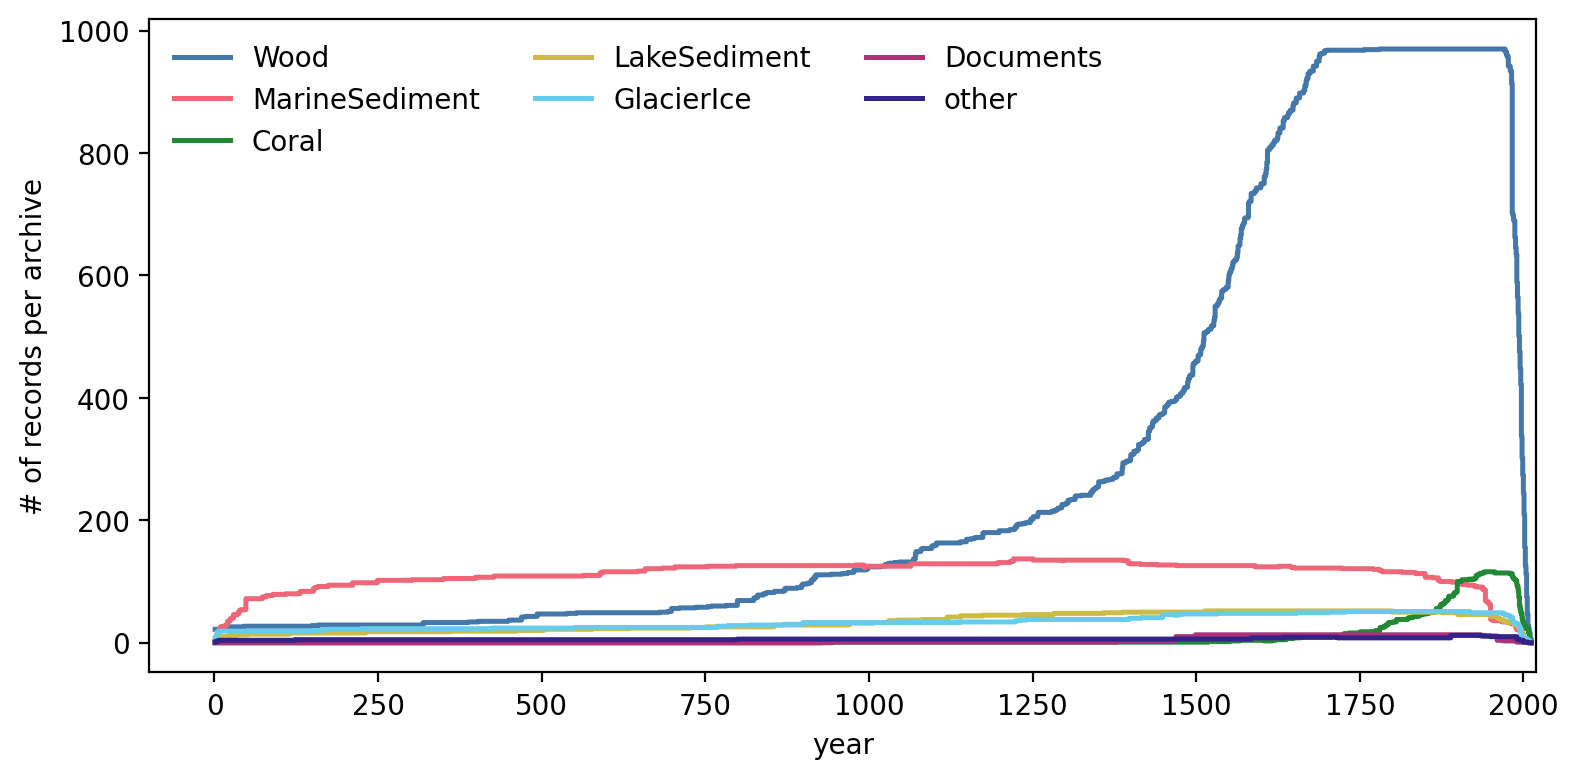

In [27]:
fig = uplt.plot_coverage(df, archives_sorted, major_archives, other_archives, archive_colour)
utf.save_fig(fig, f'time_{df.name}', dir=df.name)

## Display dataframe

### Display identification metadata: dataSetName, datasetId, originalDataURL, originalDatabase

#### index

In [28]:
# # check index
print(df.index)

RangeIndex(start=0, stop=1364, step=1)


#### dataSetName (associated with each record, may not be unique)

In [29]:
# # check dataSetName
key = 'dataSetName'
print('%s: '%key)
print(df[key].values)
print(np.unique([str(type(dd)) for dd in df[key]]))
print(f'No. of unique values: {len(np.unique(df[key]))}/{len(df)}')

dataSetName: 
['Ant-WDC05A.Steig.2013' 'NAm-MtLemon.Briffa.2002'
 'NAm-MtLemon.Briffa.2002' ... 'Ocn-TongueoftheOcean.Rosenheim.2005'
 'Ocn-TongueoftheOcean.Rosenheim.2005' 'Asi-CHIN066.Shao.2013']
["<class 'str'>"]
No. of unique values: 623/1364


#### datasetId (unique identifier, as given by original authors, includes original database token)

In [30]:
# # check datasetId

print(len(df.datasetId.unique()))
print(len(df))
key = 'datasetId'
print('%s (starts with): '%key)
print(df[key].values)
print(np.unique([str(type(dd)) for dd in df[key]]))
print('datasetId starts with: ', np.unique([str(dd.split('_')[0]) for dd in df[key]]))
print(f'No. of unique values: {len(np.unique(df[key]))}/{len(df)}')

1364
1364
datasetId (starts with): 
['pages2k_0' 'pages2k_5' 'pages2k_6' ... 'pages2k_3694' 'pages2k_3696'
 'pages2k_3697']
["<class 'str'>"]
datasetId starts with:  ['pages2k']
No. of unique values: 1364/1364


#### originalDataURL (URL/DOI of original published record where available)

In [31]:
# originalDataURL
key = 'originalDataURL'
print('%s: '%key)
print(np.unique([kk for kk in df[key]]))
print(np.unique([kk for kk in df[key] if 'this' in kk]))
print(np.unique([str(type(dd)) for dd in df[key]]))
# 'this study' should point to the correct URL (PAGES2k)
print(f'No. of unique values: {len(np.unique(df[key]))}/{len(df)}')

originalDataURL: 
['ftp://ftp.ncdc.noaa.gov/pub/data/paleo/paleolimnology/northamerica/canada/baffin/big-round2008.txt'
 'https://www1.ncdc.noaa.gov/pub/data/paleo/pages2k/pages2k-temperature-v2-2017/data-version-2.0.0/Afr-ColdAirCave.Sundqvist.2013.txt'
 'https://www1.ncdc.noaa.gov/pub/data/paleo/pages2k/pages2k-temperature-v2-2017/data-version-2.0.0/Afr-LakeMalawi.Powers.2011.txt'
 'https://www1.ncdc.noaa.gov/pub/data/paleo/pages2k/pages2k-temperature-v2-2017/data-version-2.0.0/Afr-LakeTanganyika.Tierney.2010.txt'
 'https://www1.ncdc.noaa.gov/pub/data/paleo/pages2k/pages2k-temperature-v2-2017/data-version-2.0.0/Afr-P178-15P.Tierney.2015-1.txt'
 'https://www1.ncdc.noaa.gov/pub/data/paleo/pages2k/pages2k-temperature-v2-2017/data-version-2.0.0/Afr-P178-15P.Tierney.2015-2.txt'
 'https://www1.ncdc.noaa.gov/pub/data/paleo/pages2k/pages2k-temperature-v2-2017/data-version-2.0.0/Ant-CoastalDML.Thamban.2012.txt'
 'https://www1.ncdc.noaa.gov/pub/data/paleo/pages2k/pages2k-temperature-v2-2017/da

#### originalDatabase (original database used as input for dataframe)

In [32]:
# # originalDataSet
key = 'originalDatabase'
print('%s: '%key)
print(np.unique([kk for kk in df[key]]))
print(np.unique([str(type(dd)) for dd in df[key]]))
# Note: the last two records have missing URLs
print(f'No. of unique values: {len(np.unique(df[key]))}/{len(df)}')

originalDatabase: 
['PAGES 2k v2.2.0']
["<class 'str'>"]
No. of unique values: 1/1364


### geographical metadata: elevation, latitude, longitude, site name

#### geo_meanElev (mean elevation in m)

In [33]:
# check Elevation
key = 'geo_meanElev'
print('%s: '%key)
print(df[key])
print(np.unique(['%d'%kk for kk in df[key] if np.isfinite(kk)]))
print(np.unique([str(type(dd)) for dd in df[key]]))
print(f'No. of unique values: {len(np.unique(df[key]))}/{len(df)}')

geo_meanElev: 
0       1806.0
1       2700.0
2       2700.0
3       2700.0
4       2700.0
         ...  
1359    3200.0
1360    3100.0
1361    -143.0
1362    -143.0
1363    3500.0
Name: geo_meanElev, Length: 1364, dtype: float32
['-1' '-10' '-1011' '-1022' '-1048' '-11' '-1108' '-1169' '-1185' '-12'
 '-1245' '-1274' '-1295' '-13' '-136' '-143' '-1491' '-1497' '-1570'
 '-1598' '-16' '-1648' '-18' '-1895' '-1938' '-2' '-20' '-2114' '-2224'
 '-2259' '-2263' '-2303' '-2382' '-2394' '-25' '-250' '-2543' '-2630'
 '-2793' '-3' '-330' '-355' '-3975' '-4' '-450' '-470' '-5' '-503' '-510'
 '-530' '-531' '-547' '-590' '-594' '-6' '-620' '-694' '-695' '-7' '-790'
 '-8' '-80' '-817' '-852' '-869' '-875' '-9' '-900' '-96' '-968' '-97' '0'
 '1' '10' '100' '1000' '1020' '103' '1040' '1054' '106' '110' '1100'
 '1110' '1128' '1167' '1200' '124' '1250' '1275' '130' '1300' '1330'
 '1350' '1354' '1370' '14' '140' '1400' '1450' '1465' '1495' '150' '1500'
 '1530' '1542' '1550' '160' '1600' '1650' '168' '170'

#### geo_meanLat (mean latitude in degrees N)

In [34]:
# # Latitude
key = 'geo_meanLat'
print('%s: '%key)
print(np.unique(['%d'%kk for kk in df[key]]))
print(np.unique([str(type(dd)) for dd in df[key]]))
print(f'No. of unique values: {len(np.unique(df[key]))}/{len(df)}')

geo_meanLat: 
['-1' '-10' '-12' '-13' '-15' '-16' '-17' '-18' '-19' '-21' '-22' '-23'
 '-24' '-28' '-29' '-3' '-32' '-33' '-38' '-39' '-4' '-40' '-41' '-42'
 '-43' '-44' '-47' '-5' '-6' '-64' '-66' '-7' '-70' '-72' '-74' '-75'
 '-77' '-78' '-79' '-8' '-84' '1' '10' '11' '12' '13' '16' '19' '2' '20'
 '21' '23' '24' '25' '26' '27' '28' '29' '30' '31' '32' '33' '34' '35'
 '36' '37' '38' '39' '40' '41' '42' '43' '44' '45' '46' '47' '48' '49' '5'
 '50' '51' '52' '53' '54' '55' '56' '57' '58' '59' '6' '60' '61' '62' '63'
 '64' '65' '66' '67' '68' '69' '7' '70' '71' '72' '73' '75' '76' '77' '78'
 '79' '8' '80' '81' '82']
["<class 'float'>"]
No. of unique values: 467/1364


### geo_meanLon (mean longitude)

In [35]:
# # Longitude 
key = 'geo_meanLon'
print('%s: '%key)
print(np.unique(['%d'%kk for kk in df[key]]))
print(np.unique([str(type(dd)) for dd in df[key]]))
print(f'No. of unique values: {len(np.unique(df[key]))}/{len(df)}')

geo_meanLon: 
['-10' '-103' '-105' '-106' '-107' '-109' '-110' '-111' '-112' '-113'
 '-114' '-115' '-116' '-117' '-118' '-119' '-120' '-121' '-122' '-123'
 '-125' '-127' '-128' '-13' '-131' '-132' '-133' '-134' '-135' '-136'
 '-138' '-139' '-140' '-141' '-142' '-143' '-145' '-146' '-147' '-148'
 '-149' '-150' '-152' '-157' '-159' '-16' '-162' '-17' '-174' '-18' '-19'
 '-22' '-24' '-26' '-27' '-3' '-36' '-37' '-38' '-4' '-41' '-42' '-43'
 '-50' '-54' '-57' '-60' '-61' '-62' '-64' '-65' '-66' '-67' '-68' '-69'
 '-70' '-71' '-72' '-73' '-74' '-75' '-76' '-77' '-78' '-79' '-8' '-80'
 '-82' '-83' '-84' '-86' '-89' '-9' '-91' '-93' '-94' '-95' '0' '1' '10'
 '100' '101' '103' '104' '107' '108' '109' '11' '110' '111' '112' '113'
 '114' '115' '116' '117' '118' '119' '120' '121' '122' '123' '124' '125'
 '13' '130' '133' '134' '138' '141' '142' '143' '144' '145' '146' '147'
 '148' '15' '151' '152' '153' '159' '16' '160' '162' '166' '167' '17'
 '170' '171' '172' '173' '175' '179' '18' '19' '20' '2

#### geo_siteName (name of collection site)

In [36]:
# Site Name 
key = 'geo_siteName'
print('%s: '%key)
print(df[key].values)
print(np.unique([str(type(dd)) for dd in df[key]]))
print(f'No. of unique values: {len(np.unique(df[key]))}/{len(df)}')

geo_siteName: 
['WDC05A' 'Mt. Lemon' 'Mt. Lemon' ...
 'Tongue of the Ocean, Exuma Sound Bahamas'
 'Tongue of the Ocean, Exuma Sound Bahamas' 'CHIN066']
["<class 'str'>"]
No. of unique values: 575/1364


### proxy metadata: archive type, proxy type, interpretation

#### archiveType (archive type)

In [37]:
# archiveType
key = 'archiveType'
print('%s: '%key)
print(np.unique(df[key]))
print(np.unique([str(type(dd)) for dd in df[key]]))
print(f'No. of unique values: {len(np.unique(df[key]))}/{len(df)}')

archiveType: 
['Borehole' 'Coral' 'Documents' 'GlacierIce' 'LakeSediment'
 'MarineSediment' 'Other' 'Sclerosponge' 'Speleothem' 'Wood']
["<class 'str'>"]
No. of unique values: 10/1364


#### paleoData_proxy (proxy type)

In [38]:
# paleoData_proxy
key = 'paleoData_proxy'
print('%s: '%key)
print(np.unique([kk for kk in df[key]]))
print(np.unique([str(type(dd)) for dd in df[key]]))
print(f'No. of unique values: {len(np.unique(df[key]))}/{len(df)}')

paleoData_proxy: 
['ARSTAN' 'Mg/Ca' 'Sr/Ca' 'TEX86' 'Uk37' 'accumulation rate' 'alkenone'
 'borehole' 'calcification rate' 'chironomid' 'chloride'
 'chrysophyte assemblage' 'concentration' 'count' 'd13C' 'd18O' 'dD'
 'diatom' 'dinocyst' 'dust' 'effective precipitation' 'foraminifera'
 'historical' 'humidification index' 'ice melt' 'maximum latewood density'
 'multiproxy' 'nitrate' 'pollen' 'reflectance' 'residual chronology'
 'ring width' 'sodium' 'sulfate' 'temperature' 'thickness'
 'varve thickness']
["<class 'str'>"]
No. of unique values: 37/1364


#### paleoData_sensorSpecies (further information on proxy type: species)

In [39]:
# climate_interpretation
key = 'paleoData_sensorSpecies'
print('%s: '%key)
print(np.unique([kk for kk in df[key]]))
print(np.unique([str(type(dd)) for dd in df[key]]))
print(f'No. of unique values: {len(np.unique(df[key]))}/{len(df)}')


paleoData_sensorSpecies: 
['ABAM' 'ABLA' 'Ceratoporella nicholsoni' 'Diploria labyrinthiformis'
 'Diploria strigosa' 'Hydnophora microconos, Porites lobata' 'LALA' 'LALY'
 'LAOC' 'Montastraea faveolata' 'NA' 'NaN'
 'P. australiensis, possibly P. lobata' 'PCEN' 'PCGL' 'PCMA' 'PCRU' 'PCSI'
 'PCSP' 'PIAL' 'PIAR' 'PIBA' 'PICO' 'PIFL' 'PIJE' 'PILO' 'PIPO' 'PSME'
 'Porites' 'Porites austraiensis' 'Porites lobata' 'Porites lutea'
 'Porites sp.' 'Siderastrea radians' 'Siderastrea siderea' 'TSHE' 'TSME'
 'bournoni' 'faveolata' 'heliopora' 'labyrinthiformis' 'lamellina'
 'lobata' 'lutea' 'nan' 'siderea']
["<class 'str'>"]
No. of unique values: 46/1364


#### paleoData_variableName

In [40]:
key = 'paleoData_variableName'
print('%s: '%key)
print(np.unique([kk for kk in df[key]]))
print(np.unique([str(type(dd)) for dd in df[key]]))
print(f'No. of unique values: {len(np.unique(df[key]))}/{len(df)}')


paleoData_variableName: 
['ARSTAN' 'MAR' 'Mg/Ca' 'R650/R700' 'RABD660670' 'Sr/Ca' 'TEX86' 'Uk37'
 'calcification rate' 'chloride' 'composite' 'concentration' 'count'
 'd13C' 'd18O' 'dD' 'dust' 'effective precipitation'
 'humidification index' 'ice melt' 'maximum latewood density' 'nitrate'
 'precipitation' 'reflectance' 'residual chronology' 'ring width' 'sodium'
 'sulfate' 'temperature' 'thickness' 'varve thickness']
["<class 'str'>"]
No. of unique values: 31/1364


#### paleoData_notes (notes)

In [41]:
# # paleoData_notes
key = 'paleoData_notes'
print('%s: '%key)
print(df[key].values)
print(np.unique([str(type(dd)) for dd in df[key]]))
print(f'No. of unique values: {len(np.unique(df[key]))}/{len(df)}')

paleoData_notes: 
['; climateInterpretation_seasonality changed - was originally Mean annual values; archiveType changed - was originally ice core'
 'nan' 'nan' ...
 '; climateInterpretation_seasonality changed - was originally annual'
 '; paleoData_variableName changed - was originally Sr_Ca; climateInterpretation_seasonality changed - was originally annual; paleoData_variableName changed - was originally Sr_Ca; paleoData_proxyObservationType changed - was originally Sr_Ca'
 'nan']
["<class 'str'>"]
No. of unique values: 151/1364


### climate metadata: interpretation variable, direction, seasonality

#### interpretation_direction

In [42]:
# climate_interpretation
key = 'interpretation_direction'
print('%s: '%key)
print(np.unique([kk for kk in df_compact[key]]))
print(f'No. of unique values: {len(np.unique(df_compact[key]))}/{len(df_compact)}')

interpretation_direction: 
['None' 'negative' 'positive']
No. of unique values: 3/1364


#### interpretation_seasonality

In [43]:
# climate_interpretation
key = 'interpretation_seasonality'
print('%s: '%key)
print(np.unique([kk for kk in df_compact[key]]))
print(f'No. of unique values: {len(np.unique(df_compact[key]))}/{len(df_compact)}')

interpretation_seasonality: 
['Annual' 'Apr' 'Apr-Jul' 'Apr-Jun' 'Apr-Sep' 'Aug' 'Aug-Jul' 'Dec-Feb'
 'Dec-Mar' 'Feb' 'Feb-Aug' 'Jan-Mar' 'Jul' 'Jul-Dec' 'Jul-Sep' 'Jun'
 'Jun-Aug' 'Jun-Jul' 'Jun-Sep' 'Mar-Aug' 'Mar-May' 'Mar-Oct' 'May'
 'May-Apr' 'May-Jul' 'None' 'Nov-Apr' 'Nov-Feb' 'Nov-Oct' 'Oct-Apr'
 'Sep-Apr' 'Sep-Aug' 'Sep-Nov' 'Sep-Oct' 'Summer' 'Winter' 'subannual']
No. of unique values: 37/1364


#### interpretation_variable

In [44]:
# climate_interpretation
key = 'interpretation_variable'
print('%s: '%key)
print(np.unique([kk for kk in df_compact[key]]))
print(f'No. of unique values: {len(np.unique(df_compact[key]))}/{len(df_compact)}')

interpretation_variable: 
['N/A' 'moisture' 'temperature']
No. of unique values: 3/1364


#### interpretation_variableDetail

In [45]:
# climate_interpretation
key = 'interpretation_variableDetail'
print('%s: '%key)
print(np.unique([kk for kk in df_compact[key]]))
print(f'No. of unique values: {len(np.unique(df_compact[key]))}/{len(df_compact)}')

interpretation_variableDetail: 
['None'
 'Original interpretation_variable: effectivePrecipitation, interpretation_variableDetail: eff'
 'Original interpretation_variable: precipitation, interpretation_variableDetail: N/A'
 'Original interpretation_variable: precipitation, interpretation_variableDetail: surface'
 'Original interpretation_variable: seaIce, interpretation_variableDetail: N/A'
 'air' 'air-surface' 'air@600m' 'air@condensationLevel' 'air@surface'
 'ground@surface' 'ice@surface' 'lake surface' 'lake@surface'
 'sea@surface' 'sea_surface' 'surface']
No. of unique values: 17/1364


### data 

#### paleoData_values

In [46]:
# # paleoData_values
key = 'paleoData_values'

print('%s: '%key)
for ii, vv in enumerate(df[key][:20]):
    try: 
        print('%-30s: %s -- %s'%(df['dataSetName'].iloc[ii][:30], str(np.nanmin(vv)), str(np.nanmax(vv))))
        print(type(vv))
    except: print(df['dataSetName'].iloc[ii], 'NaNs detected.')
print(np.unique([str(type(dd)) for dd in df[key]]))

paleoData_values: 
Ant-WDC05A.Steig.2013         : -37.1463 -- -30.6851
<class 'numpy.ndarray'>
NAm-MtLemon.Briffa.2002       : 0.154 -- 2.91
<class 'numpy.ndarray'>
NAm-MtLemon.Briffa.2002       : 0.205 -- 1.813
<class 'numpy.ndarray'>
NAm-MtLemon.Briffa.2002       : 0.245 -- 1.655
<class 'numpy.ndarray'>
NAm-MtLemon.Briffa.2002       : 0.283 -- 1.666
<class 'numpy.ndarray'>
NAm-MtLemon.Briffa.2002       : 0.574 -- 0.951
<class 'numpy.ndarray'>
NAm-MtLemon.Briffa.2002       : 0.707 -- 1.118
<class 'numpy.ndarray'>
NAm-MtLemon.Briffa.2002       : 0.789 -- 1.102
<class 'numpy.ndarray'>
NAm-MtLemon.Briffa.2002       : 0.757 -- 1.114
<class 'numpy.ndarray'>
Arc-Arjeplog.Bjorklund.2014   : -3.532171 -- 2.5670047
<class 'numpy.ndarray'>
Arc-Arjeplog.Bjorklund.2014   : -4.1141653 -- 2.6139
<class 'numpy.ndarray'>
Asi-CHIN019.Li.2010           : 0.298 -- 1.664
<class 'numpy.ndarray'>
NAm-Landslide.Luckman.2006    : 0.057 -- 0.76
<class 'numpy.ndarray'>
NAm-Landslide.Luckman.2006    : 0.164 --

#### paleoData_units

In [47]:
# paleoData_units
key = 'paleoData_units'
print('%s: '%key)
print(np.unique([kk for kk in df[key]]))
print(np.unique([str(type(dd)) for dd in df[key]]))
print(f'No. of unique values: {len(np.unique(df[key]))}/{len(df)}')

paleoData_units: 
['cm' 'cm/yr' 'count' 'count/mL' 'degC' 'g/cm/yr' 'g/cm2/yr' 'g/cm3' 'mm'
 'mm/yr' 'mmol/mol' 'nan' 'needsToBeChanged' 'ng/g' 'percent' 'permil'
 'ppb' 'unitless']
["<class 'str'>"]
No. of unique values: 18/1364


#### year

In [48]:
# # year
key = 'year'
print('%s: '%key)
for ii, vv in enumerate(df[key][:20]):
    try: print('%-30s: %s -- %s'%(df['dataSetName'].iloc[ii][:30], str(np.nanmin(vv)), str(np.nanmax(vv))))
    except: print('NaNs detected.', vv)
print(np.unique([str(type(dd)) for dd in df[key]]))

year: 
Ant-WDC05A.Steig.2013         : 786.0 -- 2005.0
NAm-MtLemon.Briffa.2002       : 1568.0 -- 1983.0
NAm-MtLemon.Briffa.2002       : 1568.0 -- 1983.0
NAm-MtLemon.Briffa.2002       : 1568.0 -- 1983.0
NAm-MtLemon.Briffa.2002       : 1568.0 -- 1983.0
NAm-MtLemon.Briffa.2002       : 1568.0 -- 1983.0
NAm-MtLemon.Briffa.2002       : 1568.0 -- 1983.0
NAm-MtLemon.Briffa.2002       : 1568.0 -- 1983.0
NAm-MtLemon.Briffa.2002       : 1568.0 -- 1983.0
Arc-Arjeplog.Bjorklund.2014   : 1200.0 -- 2010.0
Arc-Arjeplog.Bjorklund.2014   : 1200.0 -- 2010.0
Asi-CHIN019.Li.2010           : 1509.0 -- 2006.0
NAm-Landslide.Luckman.2006    : 913.0 -- 2001.0
NAm-Landslide.Luckman.2006    : 913.0 -- 2001.0
NAm-Landslide.Luckman.2006    : 913.0 -- 2001.0
NAm-Landslide.Luckman.2006    : 913.0 -- 2001.0
NAm-SmithersSkiArea.Schweingru: 1680.0 -- 1983.0
NAm-SmithersSkiArea.Schweingru: 1680.0 -- 1983.0
NAm-SmithersSkiArea.Schweingru: 1680.0 -- 1983.0
NAm-SmithersSkiArea.Schweingru: 1680.0 -- 1983.0
["<class 'numpy.nd

#### yearUnits

In [49]:
# yearUnits
key = 'yearUnits'
print('%s: '%key)
print(np.unique([kk for kk in df[key]]))
print(np.unique([str(type(dd)) for dd in df[key]]))
print(f'No. of unique values: {len(np.unique(df[key]))}/{len(df)}')

yearUnits: 
['CE']
["<class 'str'>"]
No. of unique values: 1/1364
